# **Build program**

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer


In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]


In [4]:
from google.colab import drive
drive.mount('/content/drive')
train_data=pd.read_csv('/content/drive/MyDrive/KDDTrain+.txt',names=feature)

Mounted at /content/drive


In [5]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)



In [7]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [10]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
change_label(train_data)

In [11]:
print(train_data.label.value_counts())
xx=train_data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64


In [12]:
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [13]:
multi_label

,label
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
125968,Dos
125969,normal
125970,normal
125971,Dos


In [14]:
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df


In [15]:
numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [32]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,4
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,4
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,4
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,4
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,4
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0


In [16]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

multi_data.drop(labels= [ 'label'], axis=1, inplace=True)

In [17]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")


In [18]:
y_train_multi= multi_data[['intrusion']]
X_train_multi= multi_data.drop(labels=['intrusion'], axis=1)

In [19]:
print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


In [20]:
X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)
#%%
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_train=np.asarray(X_train).astype(np.int_)
y_train=np.asarray(y_train).astype(np.int_)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_test=np.asarray(X_test).astype(np.int_)
y_test=np.asarray(y_test).astype(np.int_)
#%%

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(GRU(256, input_shape=(1,122)))     # Gated Recurrent Unit
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))     # Hidden layer #1
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))     # Hidden layer #2
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))   # Output layer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               291840    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3

In [23]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/20
5669/5669 [==============================] - 70s 11ms/step - loss: 0.0972 - accuracy: 0.9705 - val_loss: 0.0628 - val_accuracy: 0.9780
Epoch 2/20
5669/5669 [==============================] - 55s 10ms/step - loss: 0.0625 - accuracy: 0.9786 - val_loss: 0.0513 - val_accuracy: 0.9802
Epoch 3/20
5669/5669 [==============================] - 55s 10ms/step - loss: 0.0575 - accuracy: 0.9798 - val_loss: 0.0508 - val_accuracy: 0.9822
Epoch 4/20
5669/5669 [==============================] - 53s 9ms/step - loss: 0.0543 - accuracy: 0.9809 - val_loss: 0.0531 - val_accuracy: 0.9808
Epoch 5/20
5669/5669 [==============================] - 54s 10ms/step - loss: 0.0520 - accuracy: 0.9816 - val_loss: 0.0497 - val_accuracy: 0.9815
Epoch 6/20
5669/5669 [==============================] - 54s 10ms/step - loss: 0.0498 - accuracy: 0.9821 - val_loss: 0.0491 - val_accuracy: 0.9820
Epoch 7/20
5669/5669 [==============================] - 60s 11ms/step - loss: 0.0484 - accuracy: 0.9826 - val_loss: 0.0495 - 

1575/1575 [==============================] - 4s 3ms/step - loss: 0.0435 - accuracy: 0.9841
Test results - Loss: 0.04346604272723198 - Accuracy: 98.41238260269165%


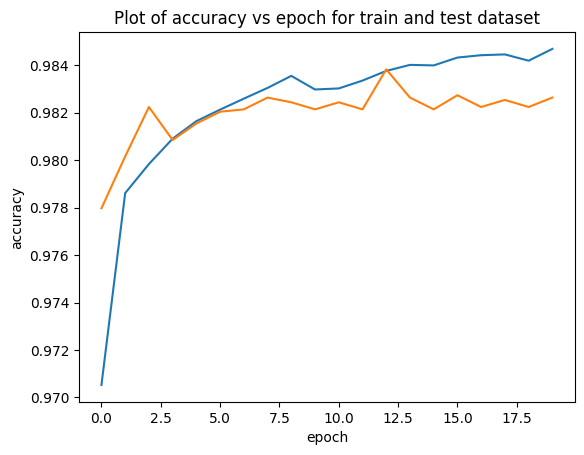

In [24]:
test_results = model.evaluate(X_test, y_test, verbose=1, batch_size=16)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
#%%
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

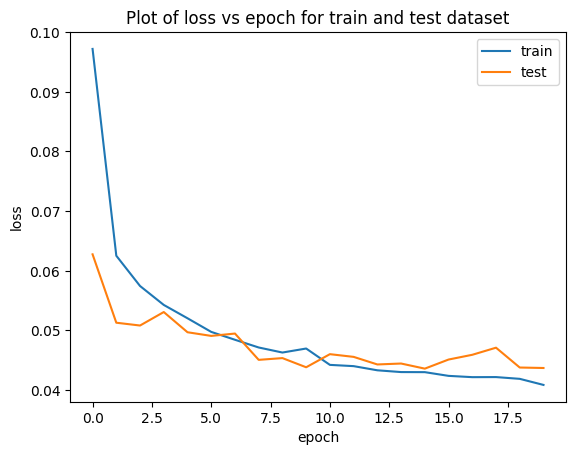

In [25]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [26]:
from sklearn.preprocessing import LabelBinarizer

y_pred_test = model.predict(X_test, batch_size=500)

# For Plot curve
y_pred_evaluation_test = to_categorical(np.argmax(y_pred_test, axis=1), 5)
y_pred_argmax_test=(np.argmax(y_pred_test, axis=1))

51/51 [==============================] - 1s 13ms/step


In [27]:
from numpy import array
# Calculating Area under the curve
def AUC(actual_class, pred_class, average = "micro"):

    #Making a set of all the unique classes
    unique_class = np.unique(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:

        #Making a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        #Making the current class with label 1 and all other classes as a label 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calculating the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [28]:
def plot_roc_curve(y_test,y_pred, classes):
    n_classes=len(classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,)

    plt.plot(fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
           fpr[i],
           tpr[i],
           color=color,
           lw=lw,
        label="ROC curve of {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC")
    plt.legend(loc="lower right")
    plt.show()


In [29]:
import itertools
from itertools import cycle


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [30]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
#%%
print('AUC Score is on Test : ' , AUC(y_test, y_pred_argmax_test))


788/788 [==============================] - 3s 4ms/step - loss: 0.0435 - accuracy: 0.9841
Test results - Loss: 0.04346605762839317 - Accuracy: 98.41238260269165%
AUC Score is on Test :  {0: 0.9907243440064227, 1: 0.9895276475210483, 2: 0.8250318583842973, 3: 0.5908892370336144, 4: 0.9837930655475583}


Classification Report on Data Test 
               precision    recall  f1-score   support

      normal       1.00      0.98      0.99      9181
         Dos       0.98      0.98      0.98      2357
       Probe       0.77      0.65      0.71       224
         R2L       0.67      0.18      0.29        11
         U2R       0.98      0.99      0.99     13422

    accuracy                           0.98     25195
   macro avg       0.88      0.76      0.79     25195
weighted avg       0.98      0.98      0.98     25195

Confusion matrix, without normalization


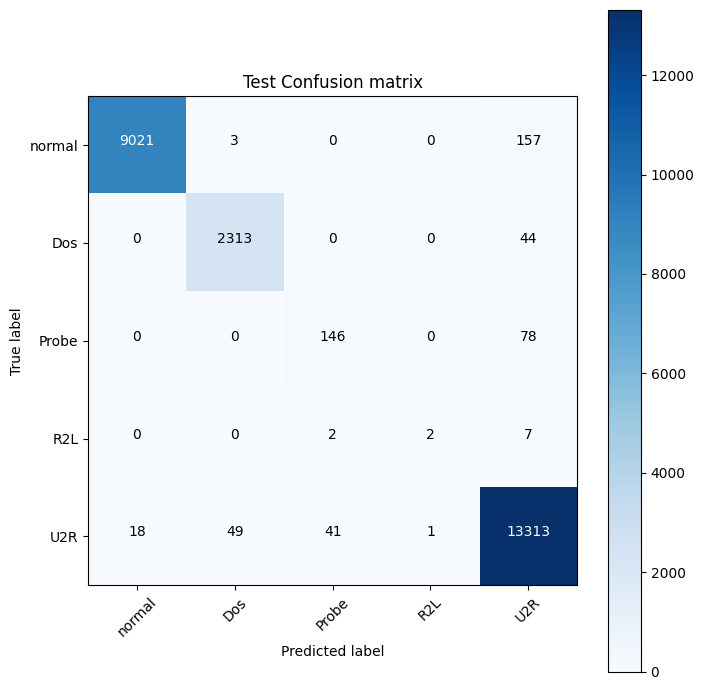

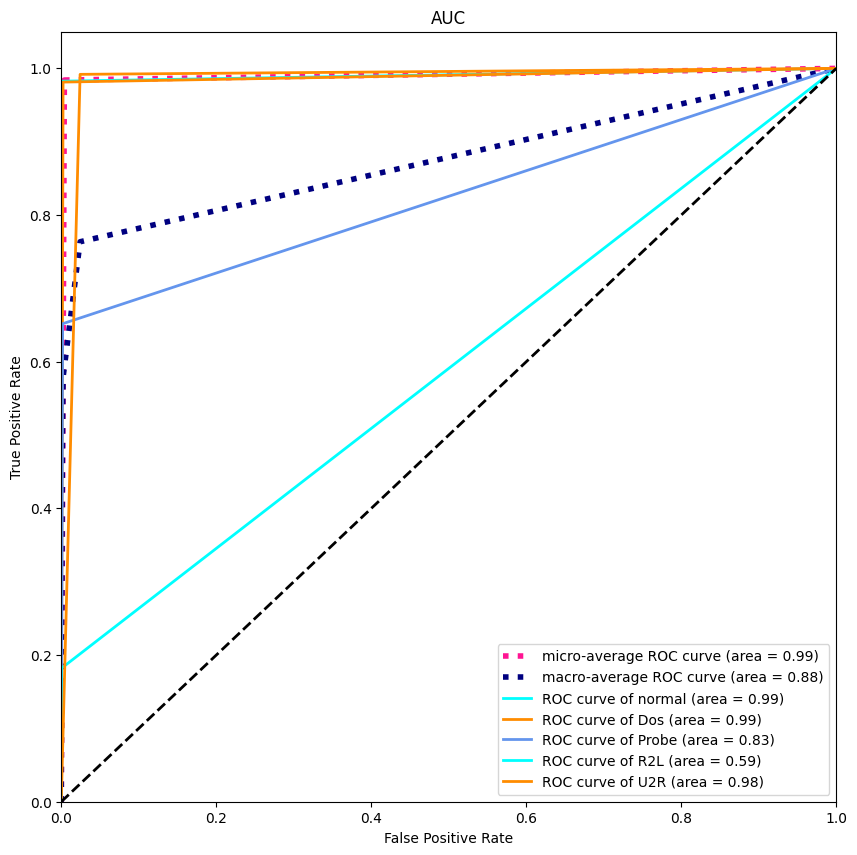

In [31]:
from sklearn.metrics import classification_report
classes=['normal', 'Dos','Probe', 'R2L','U2R']

print("Classification Report on Data Test \n" , classification_report(y_test, y_pred_argmax_test, target_names=classes))


# Compute confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_argmax_test)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Test Confusion matrix')
plt.show()
#%%
from sklearn.preprocessing import LabelBinarizer
y_test1 = LabelBinarizer().fit_transform(y_test)
plot_roc_curve(y_test1,y_pred_evaluation_test,classes=classes)

# **Convert Label to DOS and Noramal**

In [38]:
new_data= train_data
new_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [43]:
filtered_data = new_data[new_data['label'].isin(['normal', 'Dos'])]

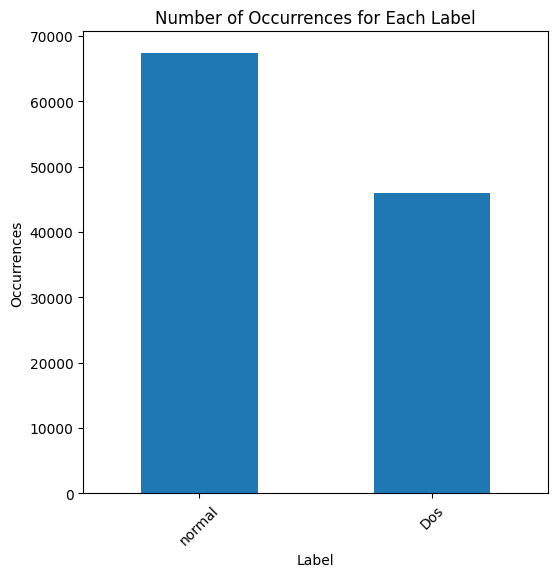

In [46]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = filtered_data['label'].value_counts()

# Plot the counts
plt.figure(figsize=(6, 6))
label_counts.plot(kind='bar')
plt.title('Number of Occurrences for Each Label')
plt.xlabel('Label')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()


In [47]:
multi_data = filtered_data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [49]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [53]:
# label encoding (0,1) Bainary-class labels (Dos,normal)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

multi_data.drop(labels= [ 'label'], axis=1, inplace=True)

In [54]:
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,-0.099319,tcp,ftp_data,SF,-0.024169,-0.052309,-0.014858,-0.094413,-0.006644,-0.085596,...,-0.884123,-0.815526,-0.194792,0.333144,-0.283192,-0.679073,-0.666814,-0.149019,-0.318156,1
1,-0.099319,udp,other,SF,-0.025239,-0.052309,-0.014858,-0.094413,-0.006644,-0.085596,...,-1.098703,-1.197734,5.154412,3.382718,-0.283192,-0.679073,-0.666814,-0.328182,-0.318156,1
2,-0.099319,tcp,private,S0,-0.025692,-0.052309,-0.014858,-0.094413,-0.006644,-0.085596,...,-0.875182,-0.972906,-0.007100,-0.397035,-0.283192,1.500671,1.516041,-0.328182,-0.318156,0
3,-0.099319,tcp,http,SF,-0.024973,0.109066,-0.014858,-0.094413,-0.006644,-0.085596,...,1.172265,1.050552,-0.476329,-0.268180,0.419381,-0.613681,-0.644986,-0.328182,-0.281967,1
4,-0.099319,tcp,http,SF,-0.025075,-0.043996,-0.014858,-0.094413,-0.006644,-0.085596,...,1.172265,1.050552,-0.476329,-0.397035,-0.283192,-0.679073,-0.666814,-0.328182,-0.318156,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.099319,tcp,private,S0,-0.025692,-0.052309,-0.014858,-0.094413,-0.006644,-0.085596,...,-0.884123,-0.972906,0.086745,-0.397035,-0.283192,1.500671,1.516041,-0.328182,-0.318156,0
125969,-0.091392,udp,private,SF,-0.025366,-0.049439,-0.014858,-0.094413,-0.006644,-0.085596,...,1.073916,0.960621,-0.382483,-0.354084,-0.283192,-0.679073,-0.666814,-0.328182,-0.318156,1
125970,-0.099319,tcp,smtp,SF,-0.018774,-0.044708,-0.014858,-0.094413,-0.006644,-0.085596,...,-0.839419,-0.927940,0.086745,-0.397035,-0.283192,0.890343,-0.666814,-0.292350,-0.318156,1
125971,-0.099319,tcp,klogin,S0,-0.025692,-0.052309,-0.014858,-0.094413,-0.006644,-0.085596,...,-1.036117,-1.130286,-0.007100,-0.397035,-0.283192,1.500671,1.516041,-0.328182,-0.318156,0


In [55]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

X_train has shape: (113270, 116) 
y_train has shape: (113270, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 256)               287232    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                       

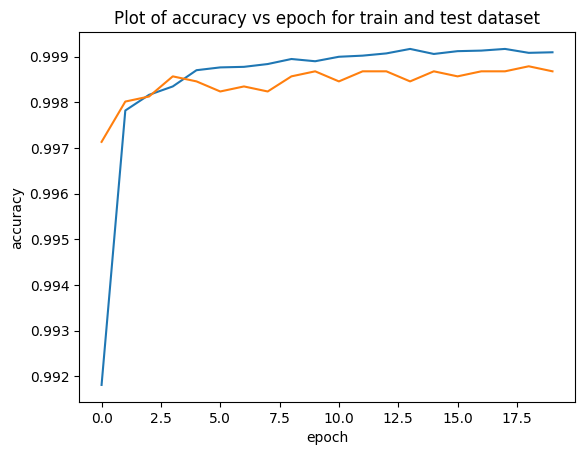

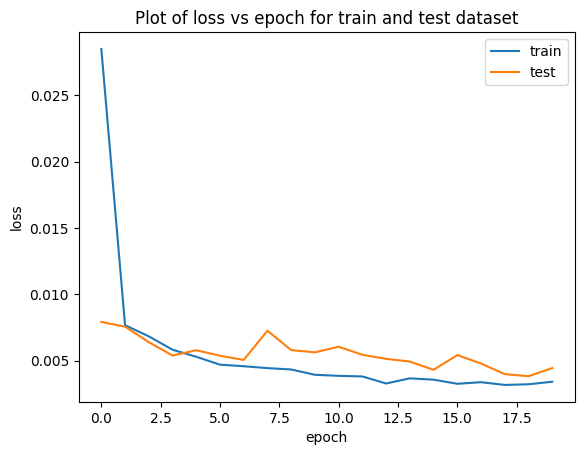

In [61]:

y_train_multi= multi_data[['intrusion']]
X_train_multi= multi_data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)
#%%

# from sklearn.preprocessing import LabelBinarizer

# y_train_multi = LabelBinarizer().fit_transform(y_train_multi)

X_train_multi=np.array(X_train_multi)
y_train_multi=np.array(y_train_multi)
#%%
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_multi,y_train_multi, test_size=0.20, random_state=42)

#%%


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_train=np.asarray(X_train).astype(np.int_)
y_train=np.asarray(y_train).astype(np.int_)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_test=np.asarray(X_test).astype(np.int_)
y_test=np.asarray(y_test).astype(np.int_)
#%%

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(GRU(256, input_shape=(1,116)))     # Gated Recurrent Unit
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))     # Hidden layer #1
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))     # Hidden layer #2
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))   # Output layer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()


history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)
#%%

test_results = model.evaluate(X_test, y_test, verbose=1, batch_size=16)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
#%%
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [75]:

from sklearn.preprocessing import LabelBinarizer

y_pred_test = model.predict(X_test, batch_size=500)

# For Plot curve
y_pred_evaluation_test = to_categorical(np.argmax(y_pred_test, axis=1), 5)
y_pred_argmax_test=(np.argmax(y_pred_test, axis=1))


46/46 [==============================] - 0s 7ms/step


In [69]:


# For evaluation

from numpy import array
# Calculating Area under the curve
def AUC(actual_class, pred_class, average = "micro"):

    #Making a set of all the unique classes
    unique_class = np.unique(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:

        #Making a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        #Making the current class with label 1 and all other classes as a label 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calculating the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict



708/708 [==============================] - 3s 5ms/step - loss: 0.0049 - accuracy: 0.9987
Test results - Loss: 0.004907265771180391 - Accuracy: 99.86757040023804%
AUC Score is on Test :  {0: 0.998761216853618, 1: 0.998761216853618}
Classification Report on Data Test 
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00      9352
         Dos       1.00      1.00      1.00     13302

    accuracy                           1.00     22654
   macro avg       1.00      1.00      1.00     22654
weighted avg       1.00      1.00      1.00     22654

Confusion matrix, without normalization


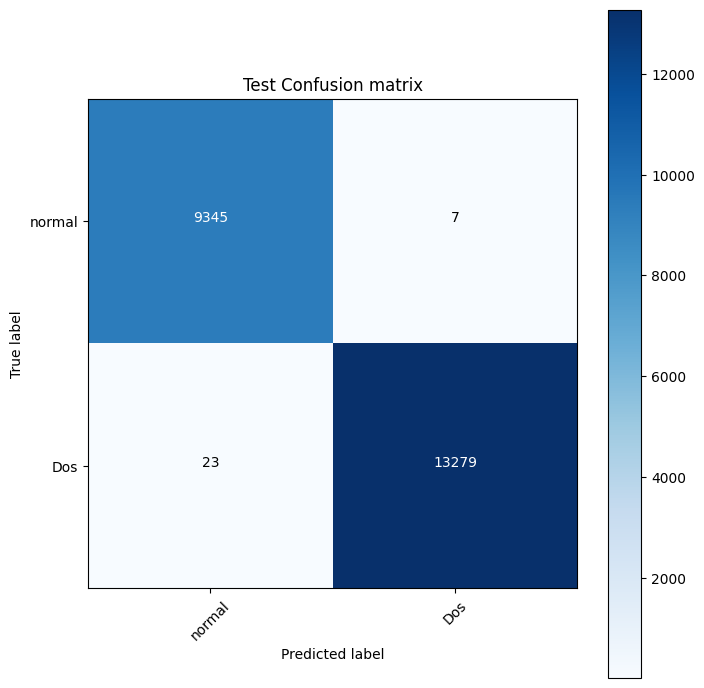

In [73]:
import itertools
from itertools import cycle


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#%%
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
#%%
print('AUC Score is on Test : ' , AUC(y_test, y_pred_argmax_test))

#%%

from sklearn.metrics import classification_report
classes=['normal', 'Dos']

print("Classification Report on Data Test \n" , classification_report(y_test, y_pred_argmax_test, target_names=classes))


# Compute confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred_argmax_test)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Test Confusion matrix')
plt.show()
#%%
from sklearn.preprocessing import LabelBinarizer
y_test1 = LabelBinarizer().fit_transform(y_test)
